# Лабораторная работа №4
# "Применение корреляционно-регрессионого анализа"
## Лапшиной Анны АТМ-22-01

### ЧАСТЬ 1. Требуется провести анализ взаимосвязи объема отказавших технических средств на технологическом объекте (ТО) и последствий, которые привели к экономическим потерям, выраженных в денежных единицах.
- Факторный признак - доля отказавшего оборудования х
-  Результативный признак - финансовые потери у
### Дано: <br>
`х = [77.8, 69, 76.5, 80.7, 72, 77.1, 64, 72, 75.9, 73.2, 69.6, 79.2, 70.8, 72.3, 71.1, 69.9, 71.1, 69.9, 70.5, 75]`<br>
`у = [18.5, 18.2, 20.4, 21.8, 16.8, 20.8, 14.2, 17, 18.4, 19.5, 17.5, 21.8, 16.5, 16.8, 16.5, 17, 16.5, 17, 17.5, 20.9]`<br>

### Проверка на однородность

In [40]:
import statistics
import numpy as np
from math import log10
from matplotlib import pyplot as plt
import pandas as pd

x = np.array([77.8, 69, 76.5, 80.7, 72, 77.1, 64, 72, 75.9, 73.2, 69.6, 79.2, 70.8, 72.3, 71.1, 69.9, 71.1, 69.9, 70.5, 75])
y = np.array([18.5, 18.2, 20.4, 21.8, 16.8, 20.8, 14.2, 17, 18.4, 19.5, 17.5, 21.8, 16.5, 16.8, 16.5, 17, 16.5, 17, 17.5, 20.9])
data = {}
for i in range(len(x)):
    data[y[i]] = x[i]
    
#Оценка мат. ожидания
mo = statistics.mean(x)
print('Оценка мат.ожидания', mo)

#Оценка СКО
sigma = np.std(x)
print('Оценка СКО', sigma) 

#Коэффициент вариации
V = sigma/mo*100
print('Коэффициент вариации',  V, '%')
if V < 33:
    print('Т.к. коэффициент вариации < 33 %, совокупность можно считать однородной')
else:
    print ('Т.к. коэффициент вариации >= 33 %, совокупность нельзя считать однородной')
        
print(data)

Оценка мат.ожидания 72.88
Оценка СКО 3.9406344666817303
Коэффициент вариации 5.407017654612693 %
Т.к. коэффициент вариации < 33 %, совокупность можно считать однородной
{18.5: 77.8, 18.2: 69.0, 20.4: 76.5, 21.8: 79.2, 16.8: 72.3, 20.8: 77.1, 14.2: 64.0, 17.0: 69.9, 18.4: 75.9, 19.5: 73.2, 17.5: 70.5, 16.5: 71.1, 20.9: 75.0}


### Проверка на промахи методом трех сигм

In [41]:
my_dict = {}
cnt = 0
n = 1
while n <= 3:
    for el in x:
        if (el <= (mo + n*sigma)) & (el >= (mo - n*sigma)):
            cnt += 1
    print ('В', n, '- сигмовый интервал входит', cnt/len(x)*100, '% элементов выборки')        
    my_dict[f'{(mo - n*sigma):.4f}-{(mo + n*sigma):.4f}'] = cnt 
    cnt = 0
    n += 1
print(my_dict)    

В 1 - сигмовый интервал входит 75.0 % элементов выборки
В 2 - сигмовый интервал входит 95.0 % элементов выборки
В 3 - сигмовый интервал входит 100.0 % элементов выборки
{'68.9394-76.8206': 15, '64.9987-80.7613': 19, '61.0581-84.7019': 20}


### Все значения факторного признака попадают в интервал 61.0581-84.7019, поэтому в первичной информации промахи отсутствуют

### Коэффициент корреляции

In [42]:
def get_rxy(x,y,n):
    x = np.array(x)
    y = np.array(y)
    Rxy = (sum(x*y) - sum(x)*sum(y)/n)/np.sqrt((sum(x*x) - (sum(x)**2)/n)*(sum(y*y) - (sum(y)**2)/n))
    print(f'Эмпирический коэффициент корреляции равен: {Rxy:.3f}')
    return Rxy

In [43]:
n = len(x)
rxy = get_rxy(x,y,n)
S_r = np.sqrt(1 - rxy**2)/np.sqrt(n - 2)
t = abs(rxy)/S_r
print('t =', t, '> 1.734')

Эмпирический коэффициент корреляции равен: 0.869
t = 7.44392319092826 > 1.734


### Определение связи между x и y

In [44]:
#Число групп
m = 1 + 3.32*log10(len(x))
print('m =', int(m))

#Величина интервала
R = max(x) - min(x)
i = R/int(m)
print('i =', round(i, 3))
my_dict1 = {}
x0 = min(x)

#Количество элементов в интервалах
count = 0
y_in_intervals = list()
interval_center = list()
y_average = list()
y_interval_sum = list()
for j in range(int(m)):
    x1 = x0 + i
    y_in_interval = list()
    for k in range(len(x)):
        if (x0 <= x[k]) & (x[k] < x1):
            count += 1
            y_in_interval.append(y[k])
    y_average.append(np.mean(y_in_interval))
    interval_center.append((x0+x1)/2)
    y_in_intervals.append(y_in_interval) 
    y_interval_sum.append(sum(y_in_interval))
    my_dict1[f'{x0:.4f}-{x1:.4f}'] = count
     
    count = 0
    x0 = x1

d1 = list()
d2 = list()
d3 = list()
d4 = list()
d5 = list()
d6 = list()
i = 0
for interval, count in my_dict1.items():
    d1.append(interval)
    d2.append(count)
    d3.append(interval_center[i])
    d4.append(y_in_intervals[i])
    d5.append(y_interval_sum[i])
    d6.append(y_average[i])
    i += 1

    # print(f'Интервал {interval}: {count} элемент(-ов, -a) входит, середина интервала {interval_center[i]},\n у в интервале {y_in_intervals[i]}, сумма у в интервале {y_interval_sum[i]},  среднее у в интервале {y_average[i]}')
d = {'Интервал' : d1, 
    'Кол-во элементов' : d2,
    'Cередина интервала' : d3, 
    'у в интервале' : d4, 
    'Cумма у в интервале' : d5, 
    'Cреднее у в интервале' : d6}
df = pd.DataFrame(data=d)
df

m = 5
i = 3.34


,Интервал,Кол-во элементов,Cередина интервала,у в интервале,Cумма у в интервале,Cреднее у в интервале
0,64.0000-67.3400,1,65.67,[14.2],14.2,14.200000
1,67.3400-70.6800,5,69.01,"[18.2, 17.5, 17.0, 17.0, 17.5]",87.2,17.440000
2,70.6800-74.0200,7,72.35,"[16.8, 17.0, 19.5, 16.5, 16.8, 16.5, 16.5]",119.6,17.085714
3,74.0200-77.3600,4,75.69,"[20.4, 20.8, 18.4, 20.9]",80.5,20.125000
4,77.3600-80.7000,3,79.03,"[18.5, 21.8, 21.8]",62.1,20.700000


### Определение модели линейной связи

In [45]:
y_intervals_freq = [v for k,v in my_dict1.items()]
print(y_intervals_freq)
inter_disp = 0
y_mean = np.mean(y)
for i, average in enumerate(y_average):
    inter_disp += y_intervals_freq[i]*((average - y_mean)**2)
inter_disp /= sum(y_intervals_freq)
print('Межгрупповая дисперсия:', inter_disp)
Sy = np.var(y)
print(f'Дисперсия по результурующему признаку: {Sy:.3f}')

eta = np.sqrt(inter_disp/Sy)
print(f'Эта равна: {eta:.3f}')
print(abs(eta**2-rxy**2), '<', 0.1, '=> можно применить линейную функцию')

[1, 5, 7, 4, 3]
Межгрупповая дисперсия: 3.057196428571428
Дисперсия по результурующему признаку: 4.026
Эта равна: 0.871
0.004630246429905283 < 0.1 => можно применить линейную функцию


### Метод МНК

In [46]:
A = np.ones((len(x),2))
A[:,1] = x
T = np.dot(np.dot(np.linalg.inv(np.dot((A.T),A)),A.T),y)

Уравнение имеет вид: y = 0.442*x + -14.059


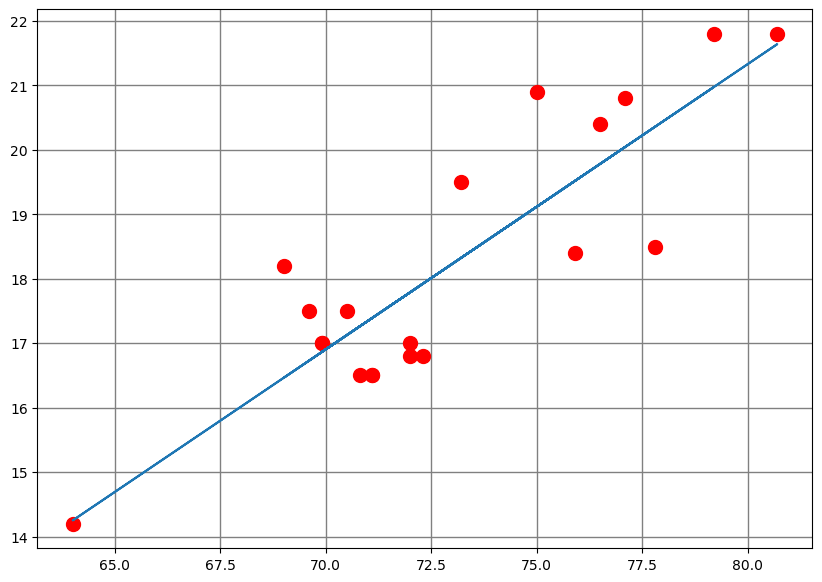

In [47]:
k = T[1]
c = T[0]

print(f'Уравнение имеет вид: y = {k:.3f}*x + {c:.3f}')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.plot(x,y, 'ro', ms=10)
ax.plot(x,[k*xi + c for xi in x])

In [ ]:
# Среднеквадратическая ошибка уравнения
Se = np.sqrt(sum(abs(y-np.array([(k*x_i + c) for x_i in x])))/(len(x)-2))
print(f'Среднеквадратическая ошибка уравнения {Se:.3f}')
Mera = Se/y_mean*100
print(f'Mera = {Mera:.2f}%')

### Метод градиентного спуска

In [38]:
def gradient(x, y, learning_rate):
    # Нормировка данных
    x_norm = (x-min(x))/(max(x)-min(x))
    y_norm = (y-min(y))/(max(y)-min(y))

    T = np.array([1,1])
    X = np.ones((len(x_norm),2))
    X[:,1] = x_norm
    
    y_new = np.dot(X,T.T)
    #Изменение коэффициентов 
    dT = learning_rate*np.sum((y_norm-y_new)*X.T,axis=1)
    
    while abs(sum(dT)) > 0.0000001:
        T = T + dT
        y_new = np.dot(X,T.T)
        dT = learning_rate*np.sum((y_norm-y_new)*X.T,axis=1)

    # Денормировка
    k = T[1]*(max(y)-min(y))/(max(x)-min(x))
    c = T[0]*(max(y)-min(y)) + min(y) - T[1]*min(x)*(max(y)-min(y))/(max(x)-min(x))

    return k, c

Полученное уравнение имеет вид: y = -0.000*x + 0.000


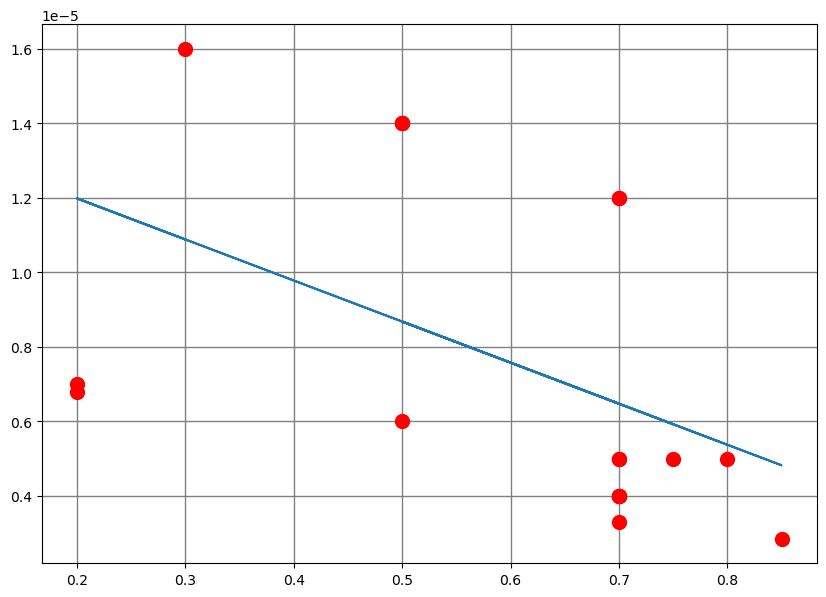

In [39]:
LR = 0.07

k,c = gradient(x, y, LR)


print(f'Полученное уравнение имеет вид: y = {k:.3f}*x + {c:.3f}')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.plot(x,y, 'ro', ms=10)
ax.plot(x,[k*xi + c for xi in x])

In [11]:
# Среднеквадратическая ошибка уравнения
Se = np.sqrt(sum(abs(y-np.array([(k*x_i + c) for x_i in x])))/(len(x)-2))
print(f'Среднеквадратическая ошибка уравнения {Se:.3f}')
Mera = Se/y_mean*100
print(f'Mera = {Mera:.2f}%')

Среднеквадратическая ошибка уравнения 0.970
Mera = 5.34%


### ЧАСТЬ 2. Требуется провести анализ взаимосвязи между результативным и факторным признаками.
- Факторный признак - уровень самодиагностики х
-  Результативный признак - интенсивность ложных срабатываний у
### Дано: <br>
`х = [0.7, 0.5, 0.7, 0.7, 0.7,0.75, 0.7, 0.5, 0.5, 0.85,0.2, 0.3, 0.2, 0.3, 0.7,0.5, 0.7, 0.7, 0.7, 0.8]`<br>
`у = [4, 14, 4, 12, 5, 5, 3.30, 14, 6, 2.85, 6.8, 16, 7, 81.8, 4, 14, 4, 12, 5, 5]*(10**-6)`<br>

### Проверка на однородность

In [12]:
import statistics
import numpy as np
from math import log10
from matplotlib import pyplot as plt

x = np.array([0.7, 0.5, 0.7, 0.7, 0.7,
              0.75, 0.7, 0.5, 0.5, 0.85,
              0.2, 0.3, 0.2, 0.3, 0.7,
              0.5, 0.7, 0.7, 0.7, 0.8])
y = np.array([4, 14, 4, 12, 5,
              5, 3.30, 14, 6, 2.85,
              6.8, 16, 7, 81.8, 4,
              14, 4, 12, 5, 5])*(10**-6)
data = {}
for i in range(len(x)):
    data[y[i]] = x[i]
    
#Оценка мат. ожидания
mo = statistics.mean(x)
print('Оценка мат.ожидания', mo)

#Оценка СКО
sigma = np.std(x)
print('Оценка СКО', sigma) 

#Коэффициент вариации
V = sigma/mo*100
print('Коэффициент вариации',  V, '%')
if V < 33:
    print('Т.к. коэффициент вариации < 33 %, совокупность можно считать однородной')
else:
    print ('Т.к. коэффициент вариации >= 33 %, совокупность нельзя считать однородной')
        
print(data)

Оценка мат.ожидания 0.585
Оценка СКО 0.19371370627810516
Коэффициент вариации 33.113454064633366 %
Т.к. коэффициент вариации >= 33 %, совокупность нельзя считать однородной
{4e-06: 0.7, 1.4e-05: 0.5, 1.2e-05: 0.7, 4.9999999999999996e-06: 0.8, 3.2999999999999997e-06: 0.7, 6e-06: 0.5, 2.85e-06: 0.85, 6.799999999999999e-06: 0.2, 1.6e-05: 0.3, 7e-06: 0.2, 8.18e-05: 0.3}


### Проверка на промахи методом трех сигмм

In [13]:
my_dict = {}
cnt = 0
n = 1
while n <= 3:
    for el in x:
        if (el <= (mo + n*sigma)) & (el >= (mo - n*sigma)):
            cnt += 1
    print ('В', n, '- сигмовый интервал входит', cnt/len(x)*100, '% элементов выборки')        
    my_dict[f'{(mo - n*sigma):.4f}-{(mo + n*sigma):.4f}'] = cnt 
    cnt = 0
    n += 1
print(my_dict)    

В 1 - сигмовый интервал входит 70.0 % элементов выборки
В 2 - сигмовый интервал входит 100.0 % элементов выборки
В 3 - сигмовый интервал входит 100.0 % элементов выборки
{'0.3913-0.7787': 14, '0.1976-0.9724': 20, '0.0039-1.1661': 20}


In [14]:
def check_miss(y: np.array, y_miss_idx) -> bool:
    sigma_y = np.std(y)
    print(f'Среднеквадратичное отклонение величины результурующего признака: {sigma_y:.3e}')
    y_mean = np.mean(y)
    print(f'Среднее значение результирующего признака {y_mean:.3e}')
    # Проверка значения по критерию 3-х сигм
    is_miss = abs(y_mean - y[y_miss_idx]) > 3*sigma_y
    return is_miss
    
    
y_miss_idx = np.argmax(y)
print(f'Номер ТС значения которого похожи на промах: {y_miss_idx + 1}')
if check_miss(y, y_miss_idx):
    print(f'Значение {y_miss_idx + 1} ТС является промахом')
else:
    print(f'Значение {y_miss_idx + 1} ТС не является промахом')

Номер ТС значения которого похожи на промах: 14
Среднеквадратичное отклонение величины результурующего признака: 1.672e-05
Среднее значение результирующего признака 1.129e-05
Значение 14 ТС является промахом


In [15]:
# Удаление из выборки промаха
x = np.delete(x, y_miss_idx)
y = np.delete(y, y_miss_idx)

### Коэффициент корреляции

In [16]:
def get_rxy(x,y,n):
    x = np.array(x)
    y = np.array(y)
    Rxy = (sum(x*y) - sum(x)*sum(y)/n)/np.sqrt((sum(x*x) - (sum(x)**2)/n)*(sum(y*y) - (sum(y)**2)/n))
    print(f'Эмпирический коэффициент корреляции равен: {Rxy:.3f}')
    return Rxy

In [17]:
n = len(x)
rxy = get_rxy(x,y,n)
S_r = np.sqrt(1 - rxy**2)/np.sqrt(n - 2)
t = abs(rxy)/S_r
print('t =', t)

Эмпирический коэффициент корреляции равен: -0.476
t = 2.2345024013845913


### Определение связи между x и y

In [18]:
#Число групп
m = 1 + 3.32*log10(len(x))
print('m =', int(m))
#Величина интервала
R = max(x) - min(x)
i = R/int(m)
print('i =', i)
my_dict1 = {}
x0 = min(x)
#Количество элементов в интервалах
cnt = 0
y_in_intervals = list()
interval_center = list()
y_average = list()
y_interval_sum = list()
for j in range(int(m)):
    x1 = x0 + i
    y_in_interval = list()
    for k in range(len(x)):
        if (x0 <= x[k]) & (x[k] < x1):
            cnt += 1
            y_in_interval.append(y[k])
    y_average.append(np.mean(y_in_interval))
    interval_center.append((x0+x1)/2)
    y_in_intervals.append(y_in_interval) 
    y_interval_sum.append(sum(y_in_interval))
    my_dict1[f'{x0:.4f}-{x1:.4f}'] = cnt
     
    cnt = 0
    x0 = x1
 
d1 = list()
d2 = list()
d3 = list()
d4 = list()
d5 = list()
d6 = list()
i = 0
for interval, count in my_dict1.items():
    d1.append(interval)
    d2.append(count)
    d3.append(interval_center[i])
    d4.append(y_in_intervals[i])
    d5.append(y_interval_sum[i])
    d6.append(y_average[i])
    i += 1

    # print(f'Интервал {interval}: {count} элемент(-ов, -a) входит, середина интервала {interval_center[i]},\n у в интервале {y_in_intervals[i]}, сумма у в интервале {y_interval_sum[i]},  среднее у в интервале {y_average[i]}')
d = {'Интервал' : d1, 
    'Кол-во элементов' : d2,
    'Cередина интервала' : d3, 
    'у в интервале' : d4, 
    'Cумма у в интервале' : d5, 
    'Cреднее у в интервале' : d6}
df = pd.DataFrame(data=d)
df
    

m = 5
i = 0.12999999999999998


/Users/annalapsina/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/annalapsina/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Интервал,Кол-во элементов,Cередина интервала,у в интервале,Cумма у в интервале,Cреднее у в интервале
0,0.2000-0.3300,3,0.265,"[6.799999999999999e-06, 1.6e-05, 7e-06]",0.000030,0.000010
1,0.3300-0.4600,0,0.395,[],0.000000,NaN
2,0.4600-0.5900,4,0.525,"[1.4e-05, 1.4e-05, 6e-06, 1.4e-05]",0.000048,0.000012
3,0.5900-0.7200,9,0.655,"[4e-06, 4e-06, 1.2e-05, 4.9999999999999996e-06...",0.000053,0.000006
4,0.7200-0.8500,2,0.785,"[4.9999999999999996e-06, 4.9999999999999996e-06]",0.000010,0.000005


In [19]:
y_intervals_freq = [v for k,v in my_dict1.items()]
print(y_intervals_freq)
inter_disp = 0
y_mean = np.mean(y)
for i, average in enumerate(y_average):
    if i == 1:
        continue
    else:
        inter_disp += y_intervals_freq[i]*((average - y_mean)**2)
inter_disp /= sum(y_intervals_freq)
print('Межгрупповая дисперсия:', inter_disp)
Sy = np.var(y)
print(f'Дисперсия по результурующему признаку: {Sy:.3e}')

eta = np.sqrt(inter_disp/Sy)
print(f'Эта равна: {eta:.3f}')
print(abs(eta**2-rxy**2), '>', 0.1, '=> нельзя применить линейную функцию')

[3, 0, 4, 9, 2]
Межгрупповая дисперсия: 7.38008660784515e-12
Дисперсия по результурующему признаку: 1.872e-11
Эта равна: 0.628
0.1672508786776744 > 0.1 => нельзя применить линейную функцию


### Метод МНК

In [20]:
A = np.ones((len(x),3))
A[:,1] = x
A[:,2] = x**2
T = np.dot(np.dot(np.linalg.inv(np.dot((A.T),A)),A.T),y)

Полученное уравнение имеет вид: y = -6.033e-05*x^2 + 5.021e-05*x + 1.276e-06


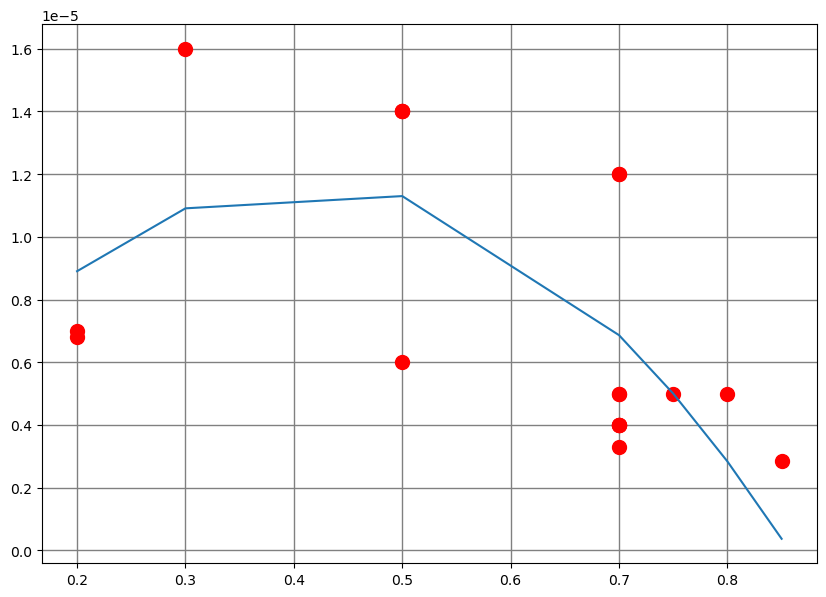

In [21]:
a2 = T[2]
a1 = T[1]
a0 = T[0]

print(f'Полученное уравнение имеет вид: y = {a2:.3e}*x^2 + {a1:.3e}*x + {a0:.3e}')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.plot(x,y, 'ro', ms=10)
ax.plot(sorted(x),[a2*xi*xi + a1*xi + a0 for xi in sorted(x)])

In [22]:
# Среднеквадратическая ошибка уравнения
Se = np.sqrt(sum((y-np.array([a2*xi*xi + a1*xi + a0 for xi in x]))**2)/(len(x)-2))
print(f'Среднеквадратическая ошибка уравнения {Se:.3e}')
Mera = Se/y_mean*100
print(f'Mera = {Mera:.2f}%')

Среднеквадратическая ошибка уравнения 3.430e-06
Mera = 45.27%


### Метод градиентного спуска

In [23]:
def gradient_2(x, y, learning_rate):   
    # Нормировка данных
    range_x = max(x)-min(x)
    range_y = max(y)-min(y)
    
    x_norm = (x-min(x))/range_x
    y_norm = (y-min(y))/range_y
    
    T = np.array([1,1,1])
    X = np.ones((len(x_norm),3))
    X[:,1] = x_norm
    X[:,2] = x_norm**2
    
    y_new = np.dot(X,T.T)
    dT = learning_rate*np.sum((y_norm-y_new)*X.T,axis=1)
    
    while abs(sum(dT)) > 0.00001:
        T = T + dT
        y_new = np.dot(X,T.T)
        dT = learning_rate*np.sum((y_norm-y_new)*X.T,axis=1)

    # Денормировка
    a2 = T[2]*range_y/(range_x**2)
    a1 = (range_x*range_y*T[1] - 2*min(x)*range_y*T[2])/(range_x**2)
    a0 = T[2]*range_y*(min(x)**2)/(range_x**2) - T[1]*range_y*min(x)/range_x + T[0]*range_y + min(y)

    return a2, a1, a0

Полученное уравнение имеет вид: y = -5.950e-05*x^2 + 4.936e-05*x + 1.466e-06


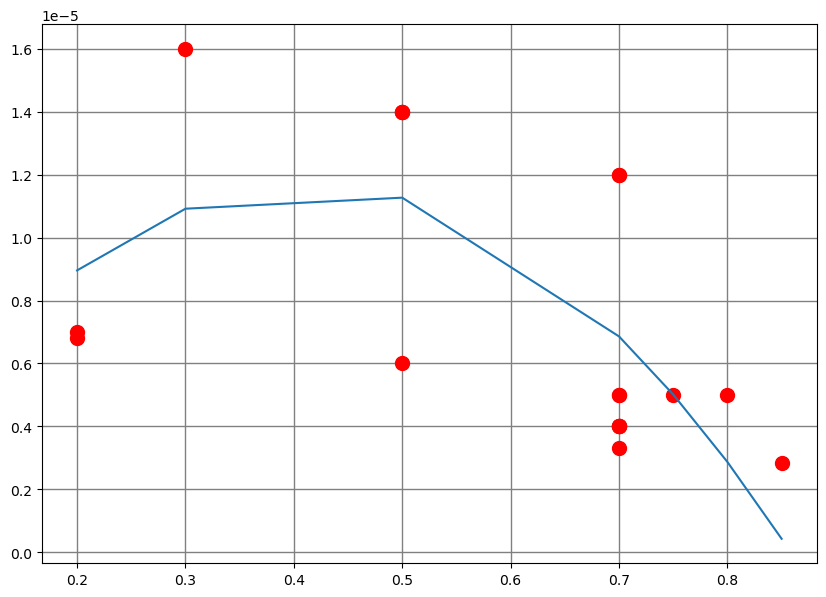

In [24]:
LR = 0.04
a2, a1, a0 = gradient_2(x, y, LR)

print(f'Полученное уравнение имеет вид: y = {a2:.3e}*x^2 + {a1:.3e}*x + {a0:.3e}')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.grid(color='grey', linestyle='-', linewidth=1)
ax.plot(x,y, 'ro', ms=10)
ax.plot(sorted(x),[a2*xi*xi + a1*xi + a0 for xi in sorted(x)])

In [25]:
# Среднеквадратическая ошибка уравнения
Se = np.sqrt(sum((y-np.array([a2*xi*xi + a1*xi + a0 for xi in x]))**2)/(len(x)-2))
print(f'Среднеквадратическая ошибка уравнения {Se:.3e}')
Mera = Se/y_mean*100
print(f'Mera = {Mera:.2f}%')

Среднеквадратическая ошибка уравнения 3.430e-06
Mera = 45.27%
